In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import seaborn as sb
import numpy as np
%matplotlib inline


In [ ]:
THIS DATA IS TAKEN FROM IBM CLOUD OBJECT STORAGE

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-04-23 23:54:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  38.3KB/s    in 1.8s    

2020-04-23 23:54:52 (38.3 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [79]:
df = pd.read_csv("FuelConsumption.csv")

In [66]:
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [67]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


VISUALIZING DATA:

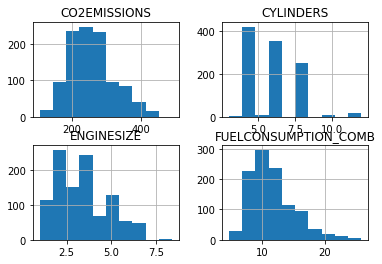

In [68]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()


1.Visualizing data- Emission vs Cylinders

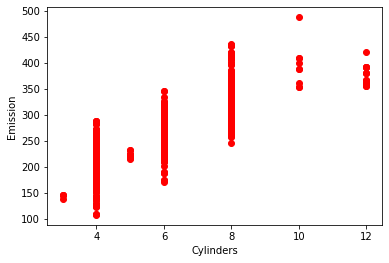

In [69]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

2.Vizualizing data- Emission vs Fuelconsumotion_comb

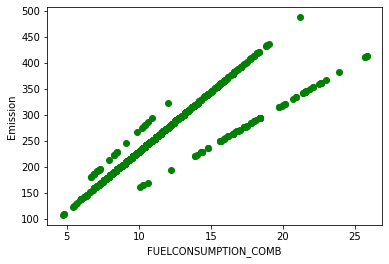

In [70]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

3.Visualizing data- Emission vs Engine size

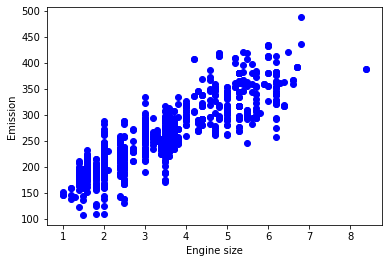

In [71]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
msk = np.random.rand(len(df)) < 0.8 #divided the data into 80-20
train = cdf[msk]
test = cdf[~msk]

In [14]:
len(train)

864

In [15]:
len(test)

203

Linear Regression Model-

1.Using independent variable as ENGINESIZE-

In [88]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.32849986]]
Intercept:  [123.79644573]


Text(0, 0.5, 'Emission')

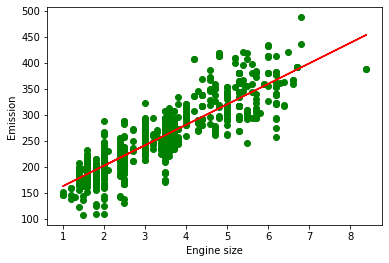

In [90]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [91]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 22.64
Residual sum of squares (MSE): 850.71
R2-score: 0.73


Testing The model-

In [92]:
y_pred = regr.predict(test_x)

In [93]:
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,255,261.446195
1,255,269.311895
2,359,355.834595
3,354,308.640395
4,338,308.640395
...,...,...
198,192,202.453445
199,267,202.453445
200,223,222.117695
201,264,241.781945


In [94]:
df.head(10)

,Actual,Predicted
0,255,261.446195
1,255,269.311895
2,359,355.834595
3,354,308.640395
4,338,308.640395
5,224,241.781945
6,227,241.781945
7,258,241.781945
8,304,241.781945
9,354,328.304645


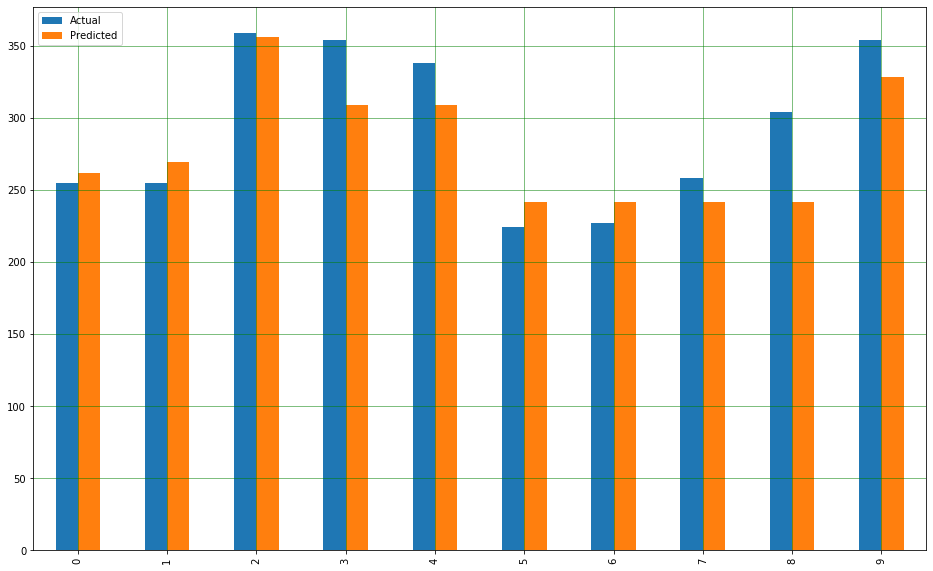

In [95]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

2.Using Cylinder as independent variable-


In [96]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[29.89842666]]
Intercept:  [82.08849583]


Text(0, 0.5, 'Emission')

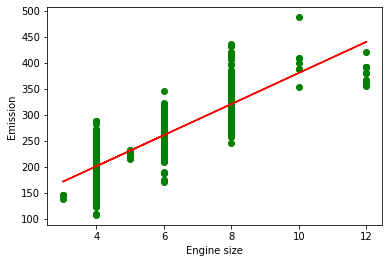

In [98]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [99]:
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 26.07
Residual sum of squares (MSE): 1126.92
R2-score: 0.57


Testing the model-

In [100]:
y_pred = regr.predict(test_x)

In [101]:
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,255,261.479056
1,255,261.479056
2,359,440.869616
3,354,321.275909
4,338,321.275909
...,...,...
198,192,201.682202
199,267,201.682202
200,223,231.580629
201,264,261.479056


In [102]:
df.head(10)

,Actual,Predicted
0,255,261.479056
1,255,261.479056
2,359,440.869616
3,354,321.275909
4,338,321.275909
5,224,261.479056
6,227,261.479056
7,258,261.479056
8,304,261.479056
9,354,381.072762


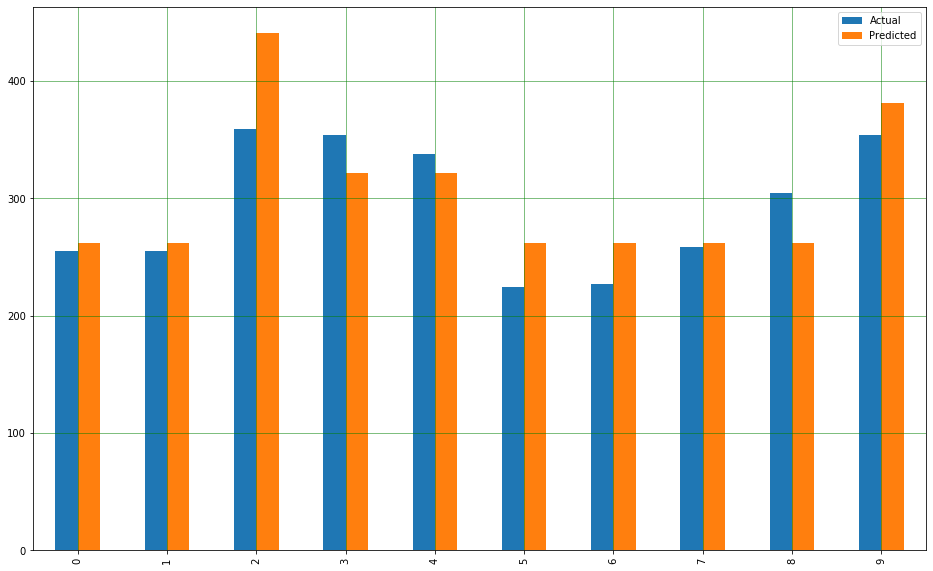

In [103]:
df1 = df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()